# Visualization with Qiskit

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

## Build a Bell State Circuit

Bell state is a maximally entangled quantum state of 2 qubits.
They are spatially seperated but exhibit perfect correlations.

It is composed of a Hadamard and CNOT gates.

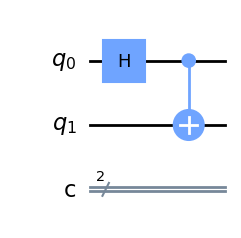

In [2]:
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)
bell.draw(output='mpl')

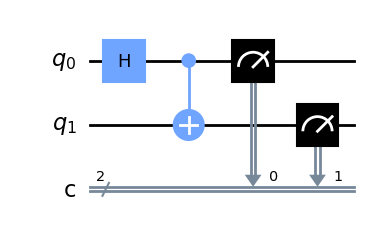

In [3]:
meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

circ = bell.compose(meas)
circ.draw(output='mpl')

### Run Simulation with QASM

In [4]:
backend = BasicAer.get_backend('qasm_simulator')
result = backend.run(transpile(circ, backend), shots=1000).result()
counts  = result.get_counts(circ)

In [5]:
print(counts)

{'11': 507, '00': 493}


### Run Simulation with State Vector Simulator

In [6]:
backend = BasicAer.get_backend('statevector_simulator')
result = backend.run(transpile(bell, backend)).result()
psi  = result.get_statevector(bell)

## Basic Visualization

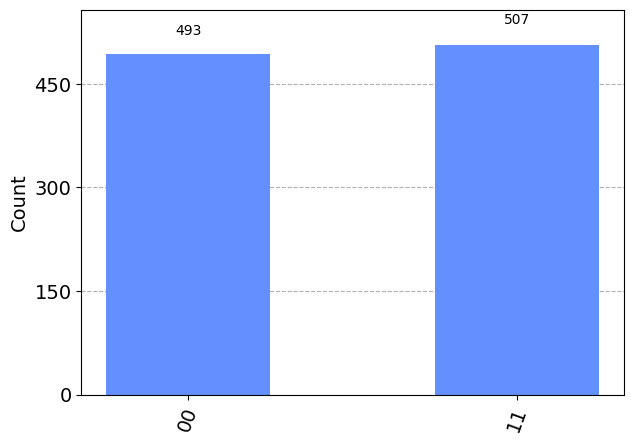

In [7]:
plot_histogram(counts)

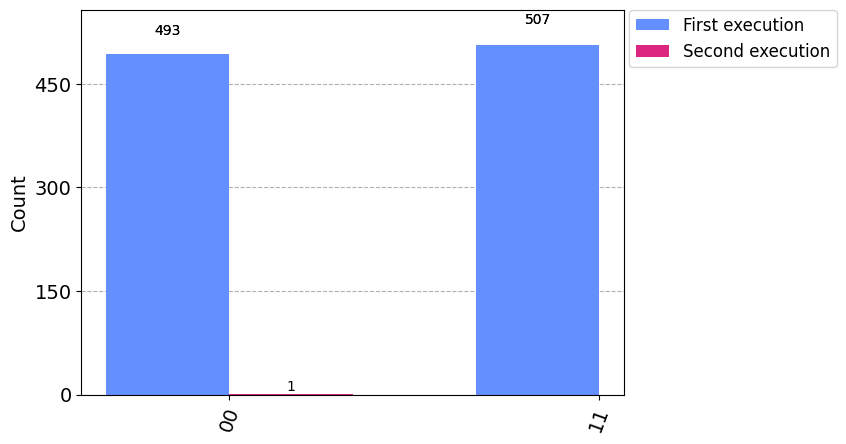

In [8]:
# Execute 2-qubit Bell state again
second_result = backend.run(transpile(circ, backend), shots=1000).result()
second_counts  = second_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)

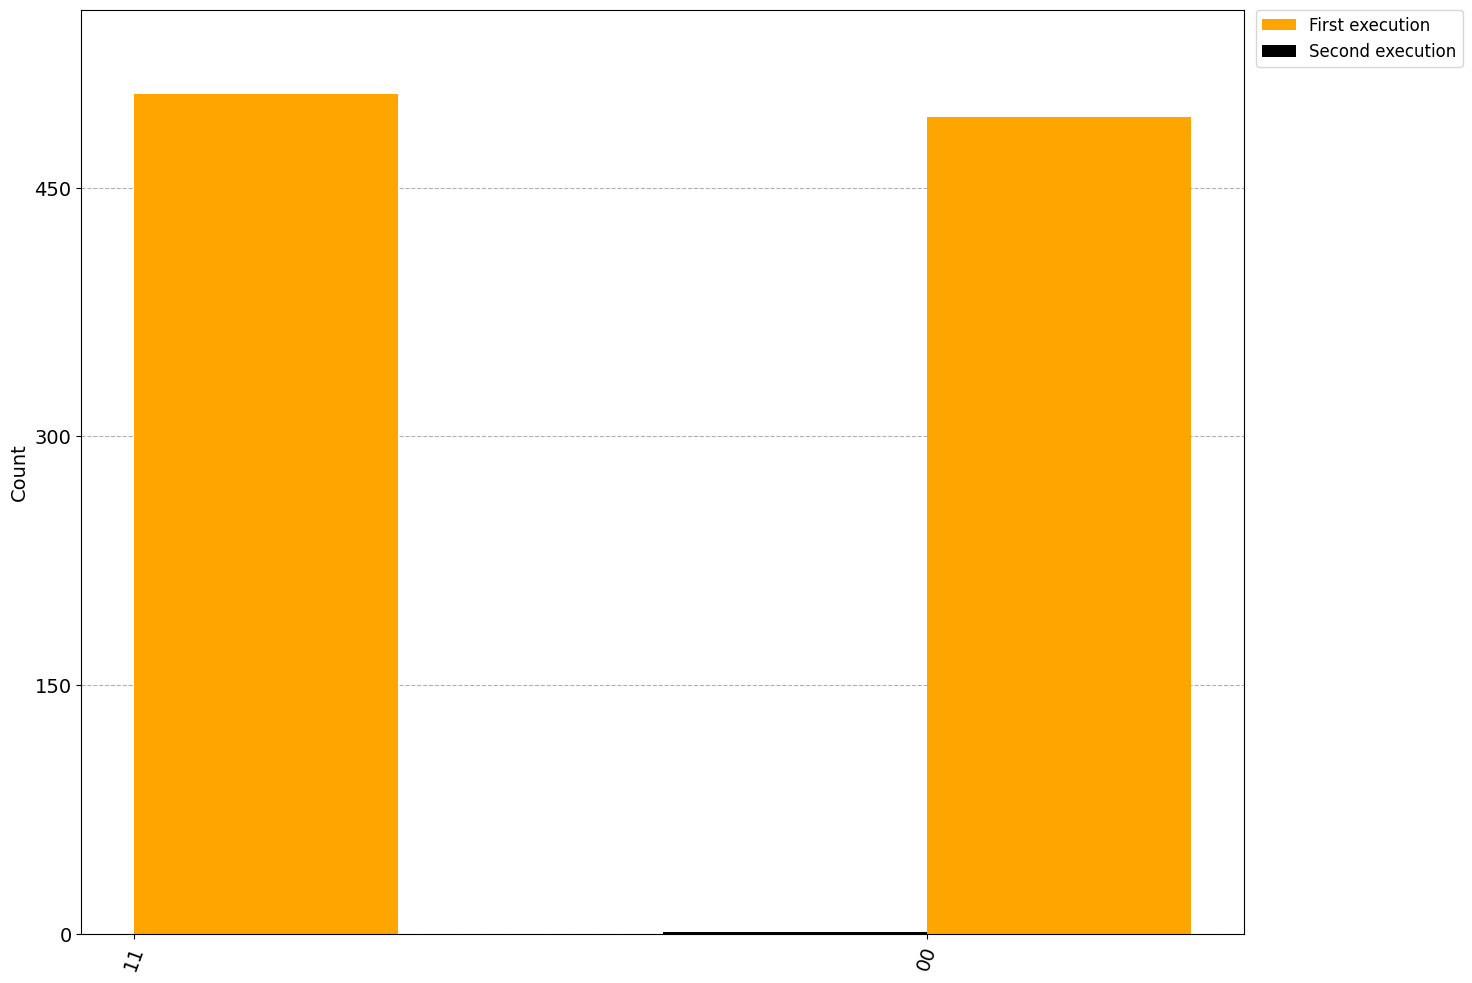

In [9]:
plot_histogram([counts, second_counts], legend=legend, sort='desc', figsize=(15,12),
               color=['orange', 'black'], bar_labels=False)

## Advanced Visualization

In [10]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

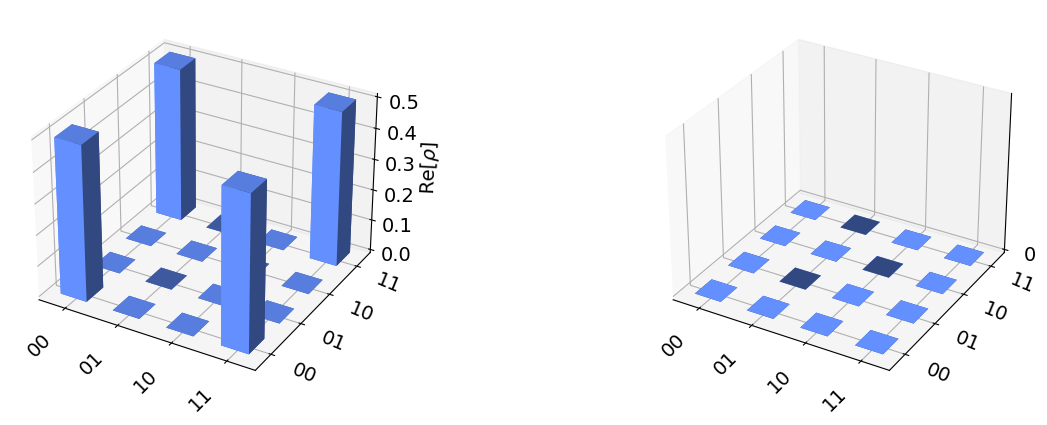

In [11]:
plot_state_city(psi)

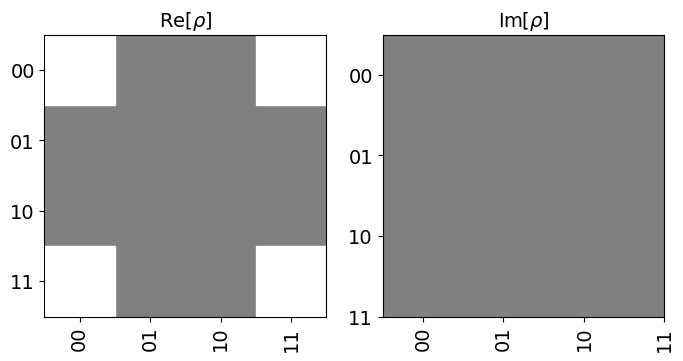

In [12]:
plot_state_hinton(psi)

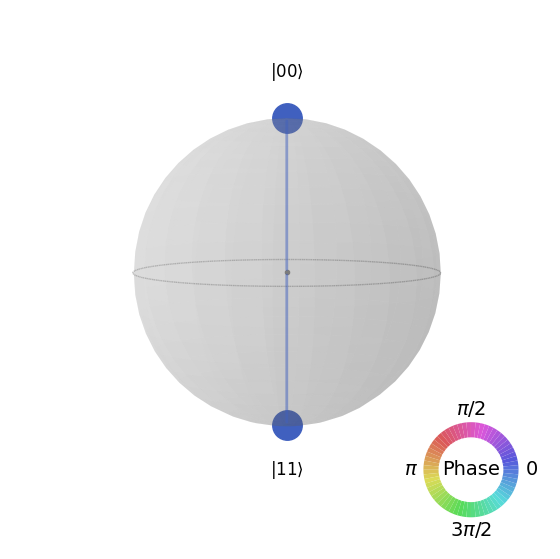

In [13]:
plot_state_qsphere(psi)

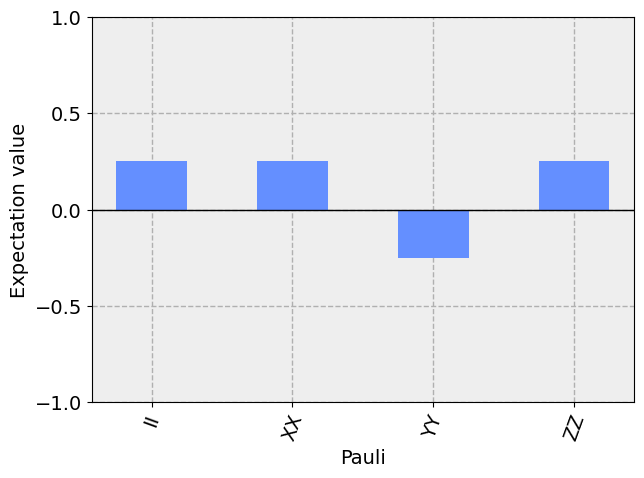

In [14]:
plot_state_paulivec(psi)

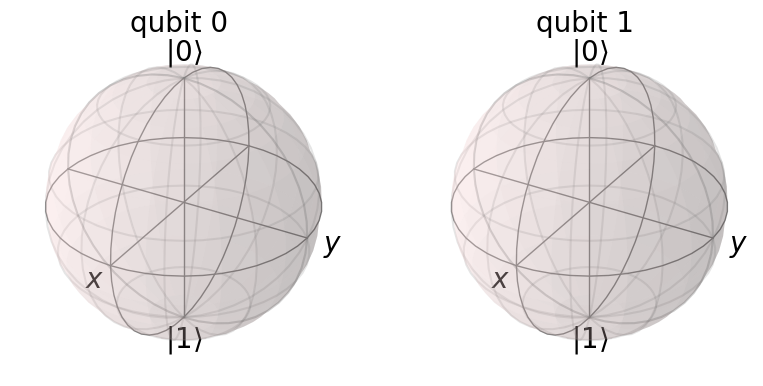

In [15]:
plot_bloch_multivector(psi)

### Customization

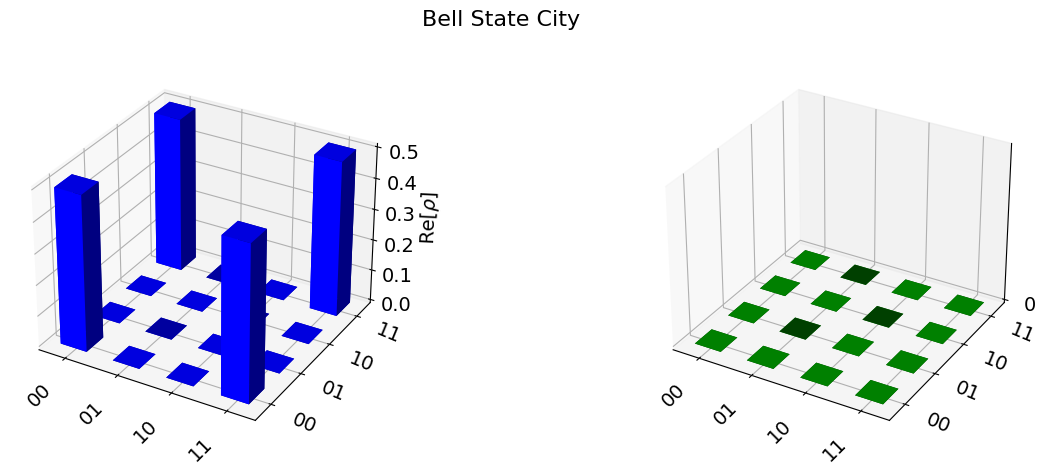

In [16]:
plot_state_city(psi, title="Bell State City", color=['blue', 'green'])

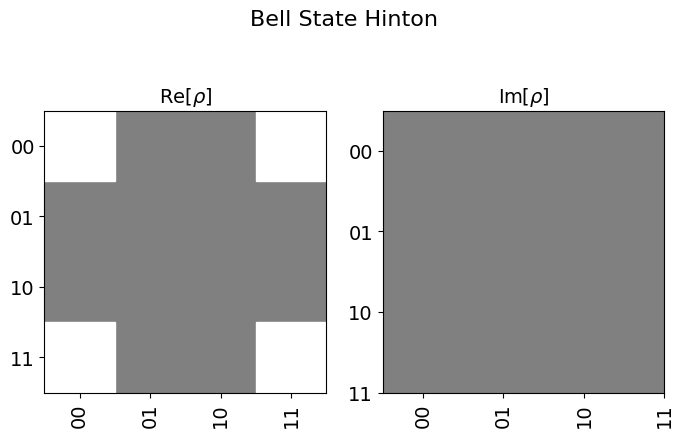

In [17]:
plot_state_hinton(psi, title="Bell State Hinton")

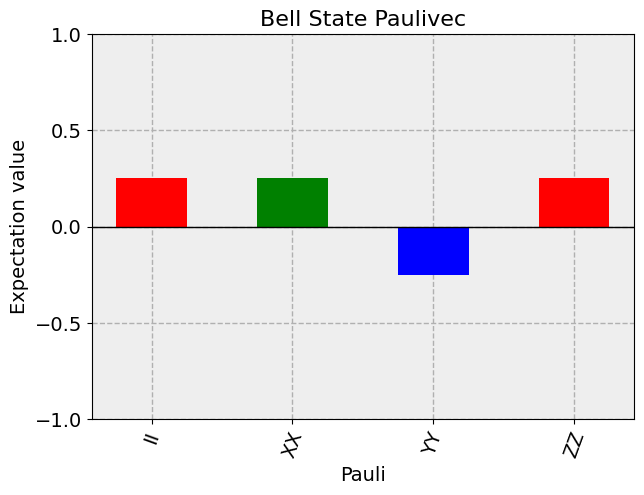

In [18]:
plot_state_paulivec(psi, title="Bell State Paulivec", color=['red', 'green', 'blue'])

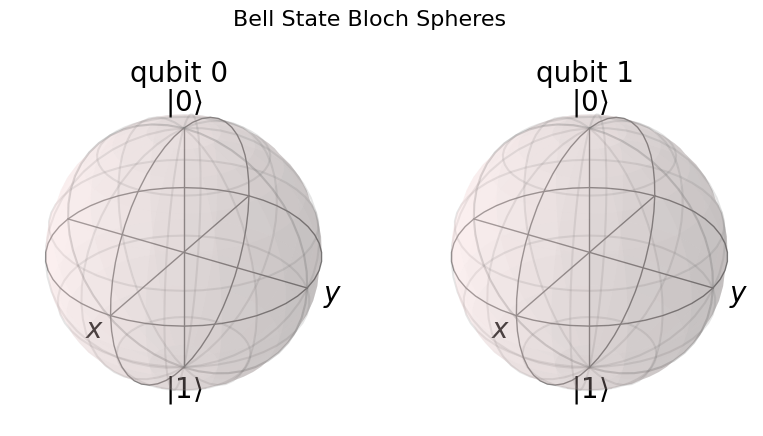

In [19]:
plot_bloch_multivector(psi, title="Bell State Bloch Spheres")